<a href="https://colab.research.google.com/github/Abiodun70/Abiodun-projects/blob/main/Machine_learning_energy_appliance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [9]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energydata_complete (1).csv')
dataset.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.2,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [3]:
dataset['RH_1'] = dataset['RH_1'].round(decimals=2)
dataset['T1'] = dataset['T1'].round(decimals = 2)
dataset['RH_2'] = dataset['RH_2'].round(decimals=2)
dataset['RH_3'] = dataset['RH_3'].round(decimals=2)
dataset['T3'] = dataset['T3'].round(decimals = 2)  
dataset['T4'] = dataset['T4'].round(decimals=2)
dataset['RH_4'] = dataset['RH_4'].round(decimals = 2)
dataset['RH_5'] = dataset['RH_5'].round(decimals = 2)
dataset['T5'] = dataset['T5'].round(decimals = 2)
dataset['T6'] = dataset['T6'].round(decimals = 2)
dataset['RH_6'] = dataset['RH_6'].round(decimals = 2)
dataset['T7'] = dataset['T7'].round(decimals = 2)
dataset['RH_7'] = dataset['RH_7'].round(decimals = 2)
dataset['RH_8'] = dataset['RH_8'].round(decimals = 2)
dataset['T8'] = dataset['T8'].round(decimals = 2)
dataset['T9'] = dataset['T9'].round(decimals = 2)
dataset['RH_9'] = dataset['RH_9'].round(decimals = 2)
dataset['T_out'] = dataset['T_out'].round(decimals = 2)
dataset['Press_mm_hg'] = dataset['Press_mm_hg'].round(decimals = 2)
dataset['RH_out'] = dataset['RH_out'].round(decimals = 2)
dataset['Windspeed'] = dataset['Windspeed'].round(decimals = 2)

dataset['Tdewpoint'] = dataset['Tdewpoint'].round(decimals = 2)


In [4]:
#check if there are missing values on the dataset
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
#Check data type.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [11]:
#check the summary statistic of the data
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
#number of rows
dataset.shape[0]

19735

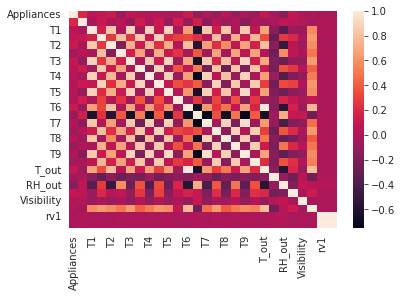

In [ ]:
sns.heatmap(dataset.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29f4a35650>,
      dtype=object)

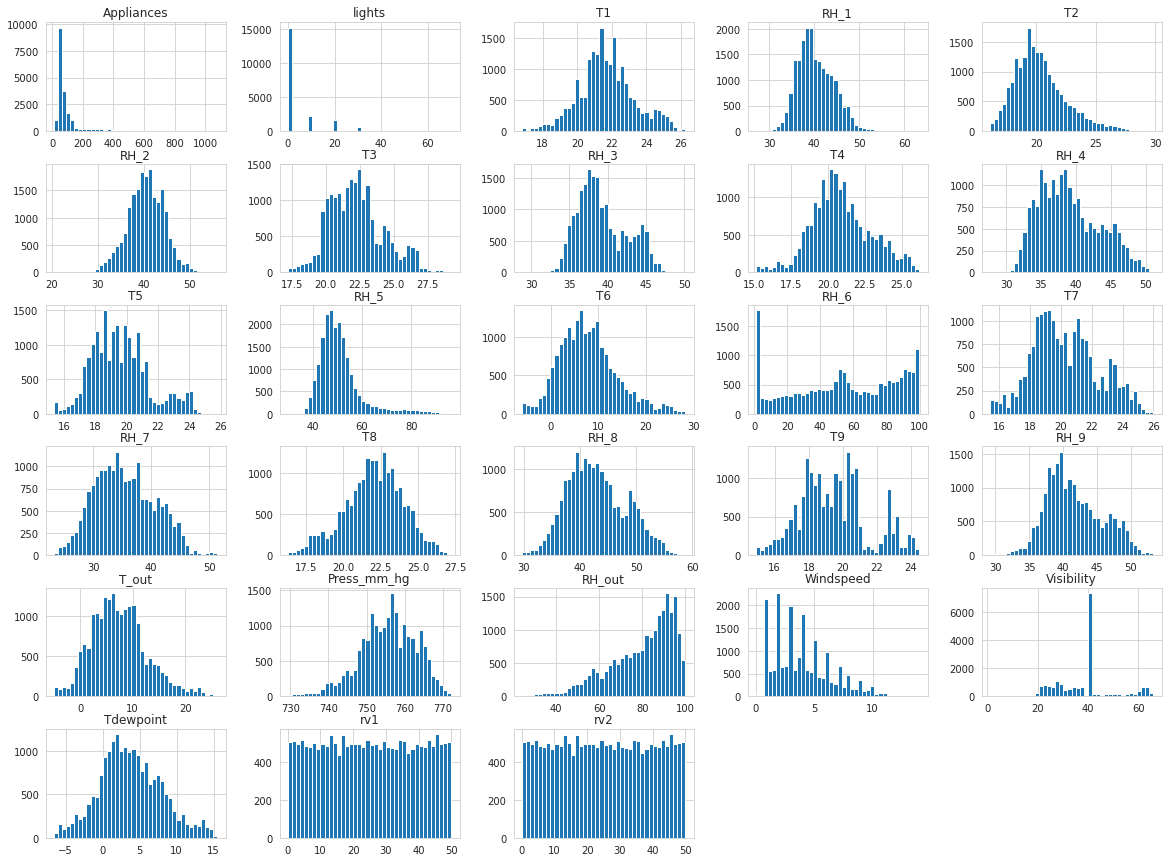

In [8]:
dataset.hist(bins=40, figsize=(20,15))

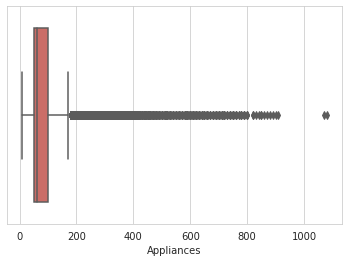

In [ ]:
sns.boxplot(x="Appliances", data=dataset, palette="hls")

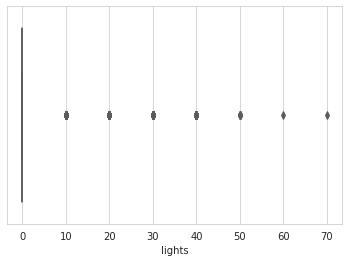

In [ ]:
sns.boxplot(x="lights", data=dataset, palette="hls")

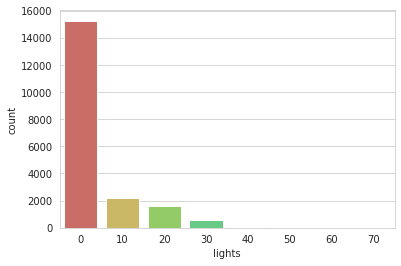

In [ ]:
sns.countplot(x="lights", data=dataset, palette="hls")

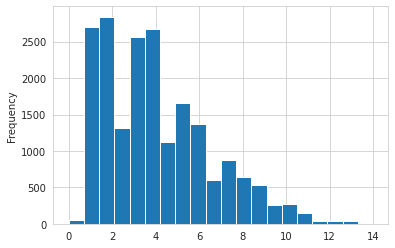

In [ ]:
dataset['Windspeed'].plot.hist(bins =20)

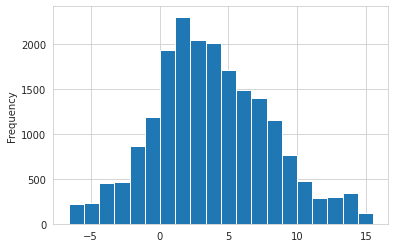

In [ ]:
dataset['Tdewpoint'].plot.hist(bins =20)

In [ ]:
## prediction

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset.T2, dataset.T6,test_size=0.3, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_model = LinearRegression()
#fit the model to the training dataset
lin_model.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [17]:
prediction = lin_model.predict(x_test.values.reshape(-1, 1))

In [18]:
prediction

array([ 2.15578912, 10.01116055,  1.87391554, ...,  4.24758774,
        8.69822311,  4.9893603 ])

In [19]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, prediction)
print('R^2 Score is: ', round(r2_score, 2)) # to 2 decimal place

R^2 Score is:  0.64


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [21]:
##  Q-13
#Mean Absolute Error (MAE)
#Firstly, we normalise our dataset to a common scale using the min max scaler


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = dataset.drop(columns=['date', 'lights'])
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df2 = df_scaled.drop(columns=['Appliances'])
target = df_scaled['Appliances']


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2, target,
test_size=0.3, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [24]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred= linear_model.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('The Mean Absolute Error (MAE)  is: ',round(mae, 3)) # to 2 decimal place

The Mean Absolute Error (MAE)  is:  0.05


In [27]:
#Q14
residual_sum = np.sum(np.square(y_test - y_pred))
print('The Residual Sum of Squares  is: ',round(residual_sum, 2))

The Residual Sum of Squares  is:  45.35


In [29]:
#Q-15

from sklearn.metrics import mean_squared_error
mean_square = np.sqrt(mean_squared_error(y_test, y_pred))
print('The Root Mean Squared Error  is: ',round(mean_square, 3))

The Root Mean Squared Error  is:  0.088


In [30]:
#Q16

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
print('The Coefficient of Determination (R^2 Score) is: ', round(r2_score, 2))


The Coefficient of Determination (R^2 Score) is:  0.15


In [37]:
#Q17
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df



linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
linear_model_weights.sort_values(by='Linear_Model_Weight', ascending=False)

,Features,Linear_Model_Weight
25,RH_1,0.553547
24,T3,0.290627
23,T6,0.236425
22,Tdewpoint,0.117758
21,T8,0.101995
20,RH_3,0.096048
19,RH_6,0.038049
18,Windspeed,0.029183
17,T4,0.028981
16,RH_4,0.026386


In [31]:
#Q18

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.4)
ridge.fit(x_train, y_train)

Ridge(alpha=0.4)

In [32]:
ridge_pred = ridge.predict(x_test)

In [33]:
mean_square = np.sqrt(mean_squared_error(y_test, ridge_pred))
print('The root mean squared error (mean_square) is: ', round(mean_square, 3))

The root mean squared error (mean_square) is:  0.088


In [34]:
#Q-19

from sklearn.linear_model import Lasso
las  = Lasso(alpha=0.001)
las.fit(x_train, y_train)


Lasso(alpha=0.001)

In [39]:
lasso_weights_df = get_weights_df(las, x_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [40]:

#20
lasso_pred = las.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print('The root mean squared error (rmse) is: ', round(rmse, 3))

The root mean squared error (rmse) is:  0.094
